
#<font color='red'>***DECISION TREE***</font>


Notebook written by <font color='red'>***Pranav Chellagurki***.</font>

#Contents:
- Why decision tress?
- How are decision trees created?
- How to handle missing data
- Random forests

#Why decision trees?

Decision trees are usually used in classification problems.
\
Why would we want to move away from a method we already know?
In general, logistic regression is used when the data is linearly separable.
\
\
Further, say we build a model to predict if a person has a high-paying wage or not. An attribute such as "company" would definitely be a helpful attribute.
For example, a person who works at Google probably earns more than a person who works at Yahoo, or Bing. So, we can say with reasonable confidence that the attribute "company" shows a high correlation with the salary. But, how would we represent this? The term "Google", "Yahoo", and "Bing" means absolutely nothing to the model. It can only interpret NUMERICAL data. One way to solve this would be to map these to numerical values. Yahoo -> 0, Google -> 1, Bing -> 2.
\
Will this solve the problem? NO! Remember that our logistic regression algorithm will output a WEIGHT associated with each parameter.
\
\
If were to calculate the salary based on the person's company and experience:
\
Salary = W1*(experience) + W2*(company)
\
\
Does this mean that a person working @ yahoo earns 2xMore than the person working at google? and because Yahoo was labeled 0, does that mean we simply ignore the parameter, because it equates to 0? what if our dataset had employees from 20 companies. Does that mean that the person working in the 20th company, earns 20 times more than the person working in the first company?NO!
\
\
These are just arbitrary labels. Using categorical data gets tricky when dealing with logistic regression. Decision trees on the other hand beautifully handles categorical data. It understands that they do not carry any additional meaning other than the fact that they are simply values using which the data can be SEPARATED (Better grouped).

Imagine that you were building a model to predict if a student will be awarded the Nobel Prize in the future. Remember, that Decision Trees is a supervised learning method, therefore, our training data consists of previous students who have been labeled as either having won the NOBEL prize, or NOT.
\
\
For each student, assume that we know the following:
\
i) Marks (Good, or Bad)
\
ii) Caught_cheating (Yes or No)
\
iii) Attendance (Good or Bad)
\
iv) Shoe_brand (Nike or Adidas)
\
\
For starters, let us assume that you can ONLY PICK ONE attribute of the above to predict if a student will be awarded The Nobel Prize or not. What would you pick?
\
\
You might be tempted to pick "MARKS". After all, we have always been told that grades are the best measure of success. But, what about academic integrity? A student might have scored well, but he might have cheated in the exams. In the long run, will his inclination toward cheating in an exam affect his/her chances to achieve the Nobel Prize? Does Marks still look like the best option?
\
\
Okay, so, from our above example, it seems like we need to prioritize academic integrity over marks. But, what if most of the students are just lazy? They simply don't care about their grades, and hence, don't go through the additional step of cheating in an exam. Okay, so if not "caught_cheating", can we choose Shoe_brand as our attribute?
\
\
Does the attribute "Shoe_brand" play any role at all in this example? Does a student who wears Nike have a better chance of being awarded the Nobel prize than a student who wears Adidas?
\
\
What about "Attendance"? A student might not be the smartest of the bunch, but, he/she might be consistent in the efforts they put in. Does that seem like a good attribute in judging a student?

**We need a way using which we can compare two different attributes. In many ways, you can call this the LOSS function of the Decision Tree algorithm.**

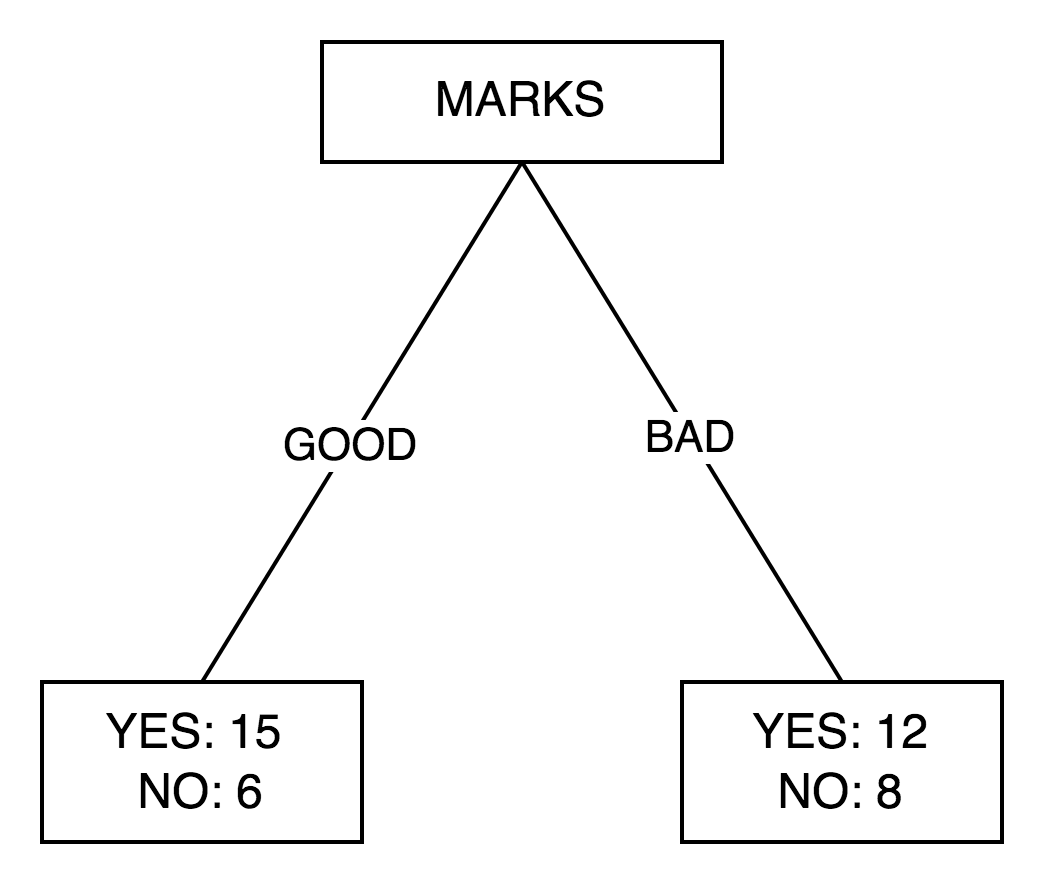

The above diagram describes the model using "Marks" as the deciding attribute.
\
YES: Represents the NUMBER of students who WON a Nobel Prize.
\
NO: Represents the number of students who did not win a Nobel Prize.
\
\
The above diagram can be interpreted as:
- Of the students with GOOD MARKS, 15 were awarded the Nobel Prize, whereas 6 were NOT.
- Of the students with BAD MARKS, 12 were awarded the Nobel Prize, whereas 8 were NOT.

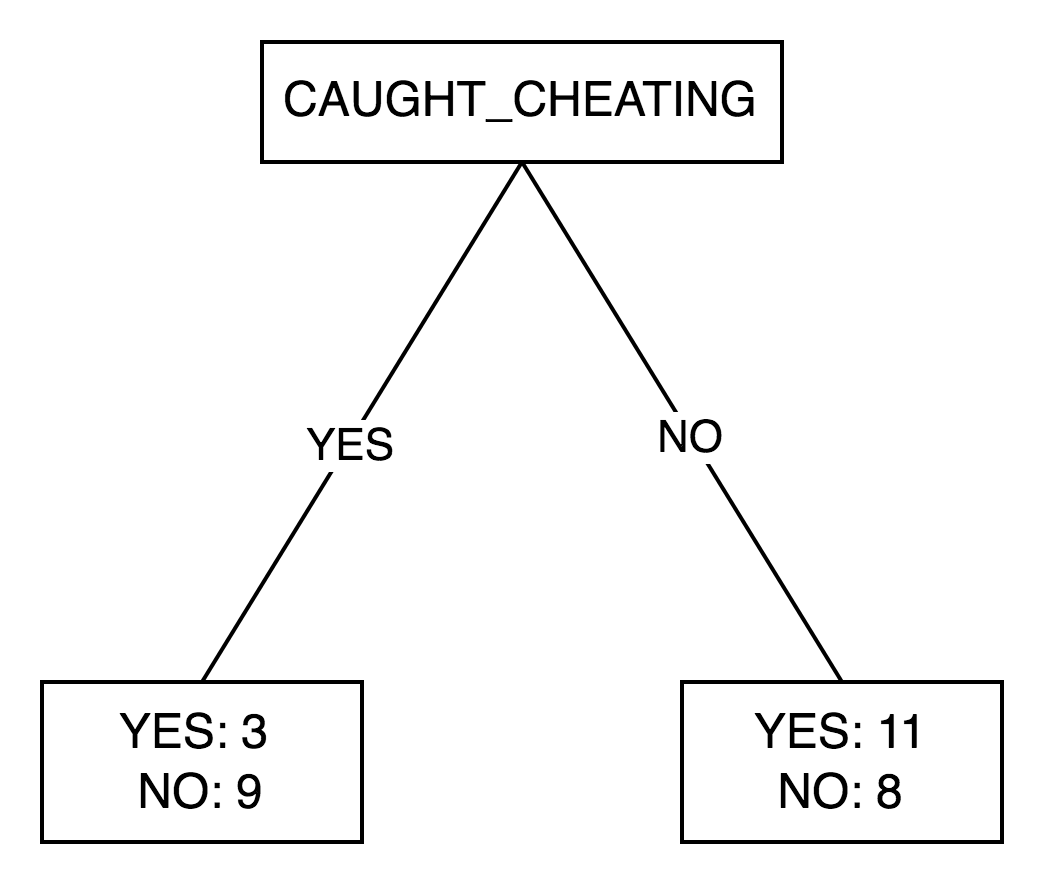

The above diagram describes the model using "CAUGHT CHEATING" as the deciding attribute.
\
\
YES: Represents the NUMBER of students who WON a Nobel Prize.
\
NO: Represents the number of students who did not win a Nobel Prize.
\
\
The above diagram can be interpreted as:
- Of the students who were CAUGHT CHEATING, 3 were awarded the Nobel Prize, whereas 9 were NOT.
- Of the students with NOT CAUGHT CHEATING, 11 were awarded the Nobel Prize, whereas 8 were NOT.

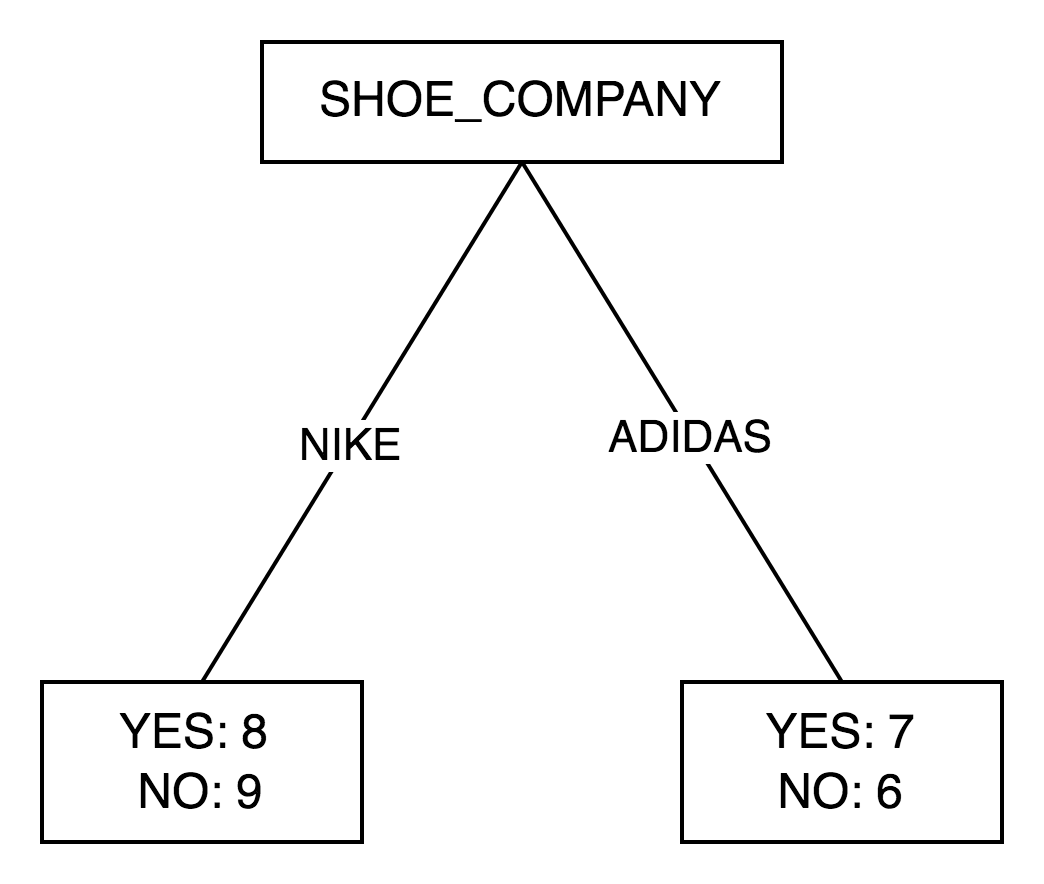

The above diagram describes the model using "Shoe brand" as the deciding attribute.
\
\
The above diagram can be interpreted as:
- Of the students who wear NIKE, 8 were awared the Nobel Prize, whereas 9 were NOT.
- Of the students with wear ADIDAS, 7 were awarded the Nobel Prize, whereas 6 were NOT.

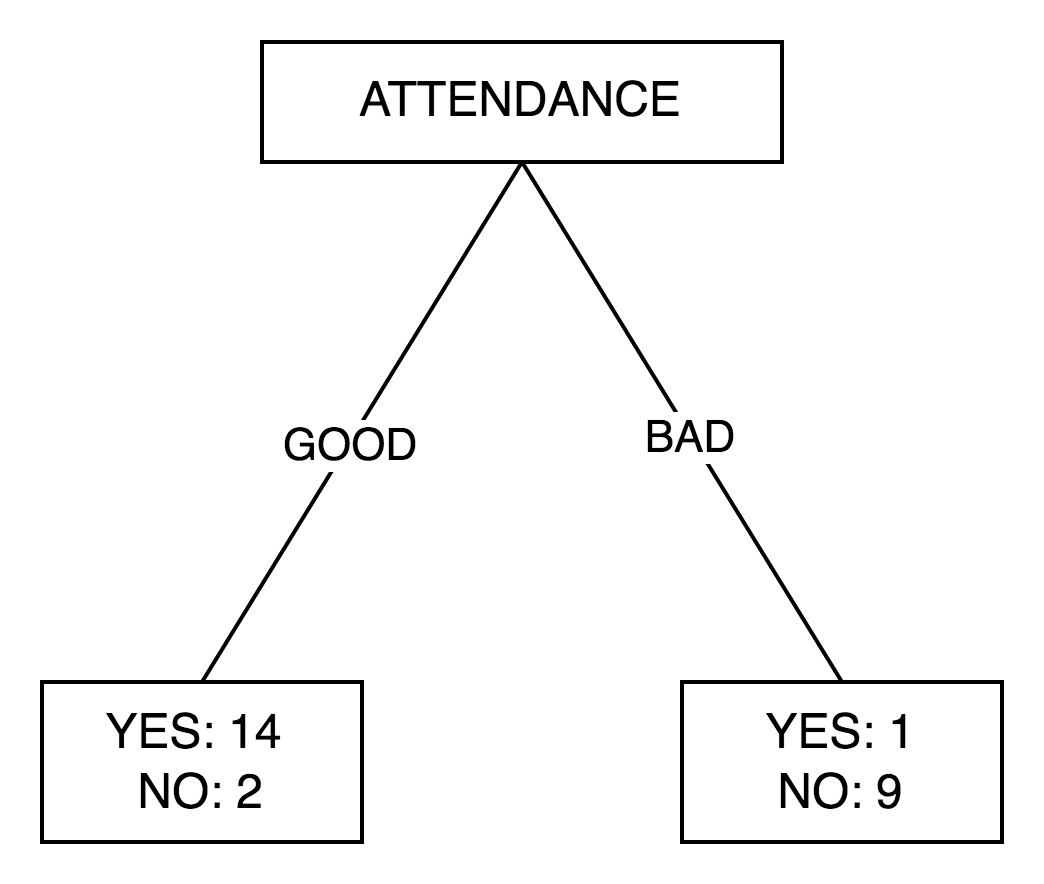

The above diagram describes the model using "ATTENDANCE" as the deciding attribute.
\
\
The above diagram can be interpreted as:
- Of the students who have a GOOD ATTENDANCE, 14 were awared the Nobel Prize, whereas 2 were NOT.
- Of the students with BAD ATTENDANCE, 1 was awarded the Nobel Prize, whereas 9 were NOT.


---



**NOTE**:

- The above diagrams are called **Decision Trees**.

- They look similar to the branches of a tree.

- The topmost node is called the **ROOT NODE**.  The resulting nodes are called **Child nodes**. You can establish a parent-child relationship when a NODE splits into two sub-nodes.

- When a parent node splits into two child nodes, it is said to form TWO **branches**, representing the two child nodes.

- When a node does not "branch" into further child nodes, it is said to be a **LEAF NODE**. Leaf nodes terminate the corresponding branch.


Coming back to our example, How do we decide which attribute to pick?
\
\
Let us choose the Decision Tree which uses the "Attendance" attribute.
Let us pick "GOOD" Branch:
\
\
The probability of a YES (P_YES): 14/(14+2) = 14/16 = 0.875
\
The probability of a NO(P_NO): 2/(14+2) = 2/16 = 0.125
\
\
**NOTE**: P_YES + P_NO = 1.


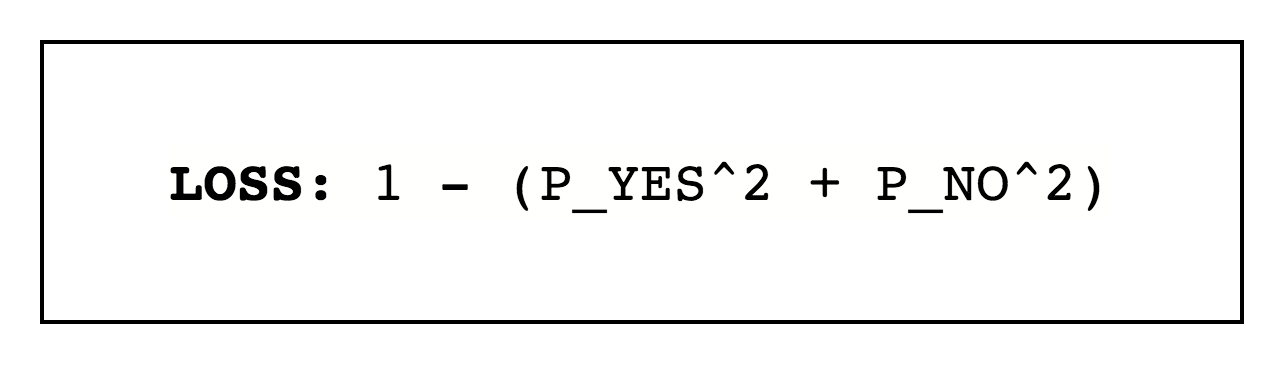

Let us demystify the above equation:
\
\
We want to **MINIMIZE** the LOSS.
\
\
**CASE 1: Best case solution**:
\
\
If P_YES = 1, which means ALL the students WON the Nobel Prize, then automatically, P_NO = 0, That is, the probability of the students who did not win a Nobel Prize is 0.
\
\
If P_YES = 0, which means NONE of the students WON the Nobel Prize, then, automatically, P_NO = 1. The probability of the students who DID not win a Nobel Prize is 1.
\
\
When P_YES = 1, then P_NO = 0
\
LOSS = 1 - (1^2 + 0^2) = 1-1 = 0.
\
\
When P_YES = 0, then P_NO = 1
\
LOSS = 1 - (0^2 + 1^2) = 1-1 = 0.
\
\
\
**CASE 2: Worst-case Scenario**:
\
\
What if the branch "GOOD ATTENDANCE" revealed to us that 9 students were awarded the Nobel Prize, whereas 9 were not? This means that P_YES == P_NO == 0.5. But, 50% is almost the same as random guessing. The model conveys NO additional information.
\
\
In such a case: P_YES^2 + P_NO^2 gives the least value: 0.25+0.25 = 0.5.
LOSS = 1 - (0.5) = 0.5

**The LOSS varies between 0 and 0.5**


---



Let us return to our example:
For Decision Tree using the ATTENDANCE attribute:
\
\
Let us calculate the LOSS for each branch.
\
\
For GOOD ATTENDANCE BRANCH
\
P_YES = 0.875
\
P_NO = 0.125
\
**LOSS**: 1-(0.875^2 + 0.125^2) = 0.219
\
\
\
For BAD ATTENDANCE BRANCH
\
P_YES = 0.1
\
P_NO = 0.9
\
**LOSS**: 1 - (0.1^2 + 0.9^2) = 0.18
\
\
NOW, let us calculate the **TOTAL LOSS** for the attribute "ATTENDANCE" (Sum of LOSS for individual branches):
0.18 + 0.219 = 0.399
\
\
Is the above formula for TOTAL LOSS, correct?
\
\
Let us assume that you visit TWO doctors for a particular diagnosis. Doctor A, with 2 years of experience tells you that it could be a sprain. Doctor B, with 10 years of experience tells you that it could be a fracture. What would be your takeaway?
\
\
Although you would still consider Doctor A's diagnosis, you would be leaning towards Doctor B's diagnosis, given his/her higher experience.
\
\
What does the above example mean in our TOTAL_LOSS equation?
\
\
The LOSS of the BRANCH with a HIGHER number of SAMPLES must be given a HIGHER WEIGHT.
\
\
Updated (weighted) LOSS Function:
\
\
**TOTAL_LOSS: (Weight_of_Branch_1) * LOSS_of_Branch_1 + (Weight_of_Branch_2) * LOSS_of_Branch_2**
\
\
Weight_of_Branch: Number of YES and NO in that Branch / Total number of YES + NO  


TOTAL_LOSS for "ATTENDANCE" Attribute:
(0.62)*(0.219) + (0.38)*(0.18) = 0.2

**The ABOVE LOSS Function is CALLED AS GINI IMPURITY**

Similary, The GINI IMPURITY FOR:
\
MARKS = 0.32
\
CAUGHT_CHEATING = 0.29
\
SHOE_COMPANY = 0.41
\
\
**WE want TO pick the attribute that MINIMIZES GINI IMPURITY.**
\
Hence, we pick ATTENDANCE.


---



---



Is this the best we can do?
\
\
Imagine that you are preparing for a test. The Subject has TWO Textbooks, A and B. The professor tells the class that MOST of the questions WILL be asked from TEXTBOOK A. What would you do?
\
\
Sure, if getting a decent grade was your ambition, you would stick JUST to Textbook A. What if you wanted more than just decent grades. IF topping the class was paramount to you, then you would HAVE to also study Textbook B. The same can be thought about Decision Trees.
\
\
Although splitting it using "Attendance" guarantees RELATIVELY good performance, we can achieve BETTER results by splitting it further. (The equivalent of referring to Textbook B for better grades).

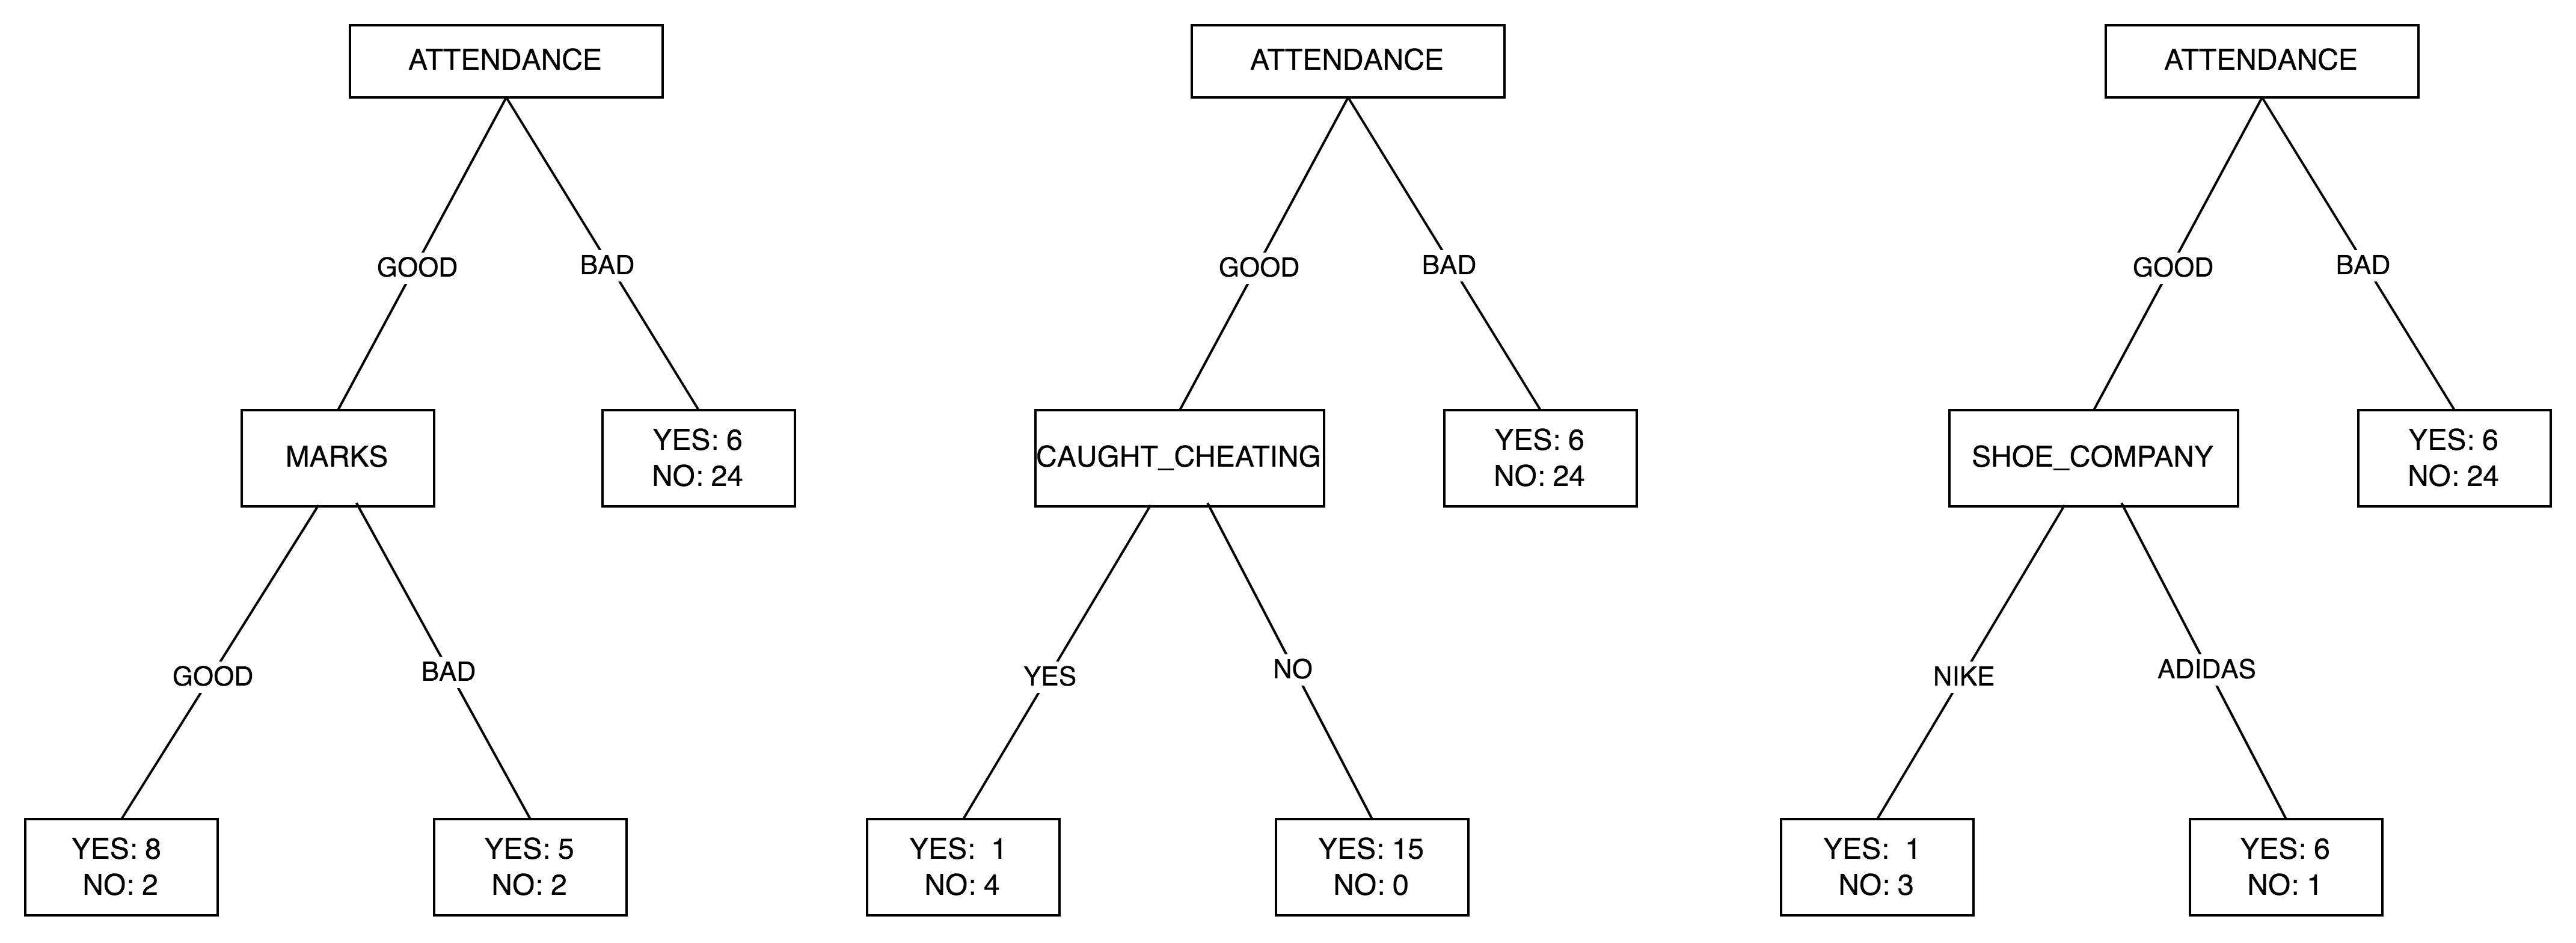

To save us the trouble of calculating the Gini Impurity for each branch, let us assume that these are the following GINI indexes:
\
Marks: 0.24
\
Caught_Cheatiung = 0.18
\
Shoe_Company = 0.43
\
**We see THAT the GINI IMPURITY OF THE Attribute "Caught_cheating" is the lowest. Hence, it can be used to further expand our TREE.**

Now, simlarly, we try to choose an attribute for the RIGHT MOST branch.
\
Assume that the following are the GINI IMPURITIES:
\
Shoe_Brand = 0.39
\
Caught_Cheating = 0.26
\
Marks = 0.21

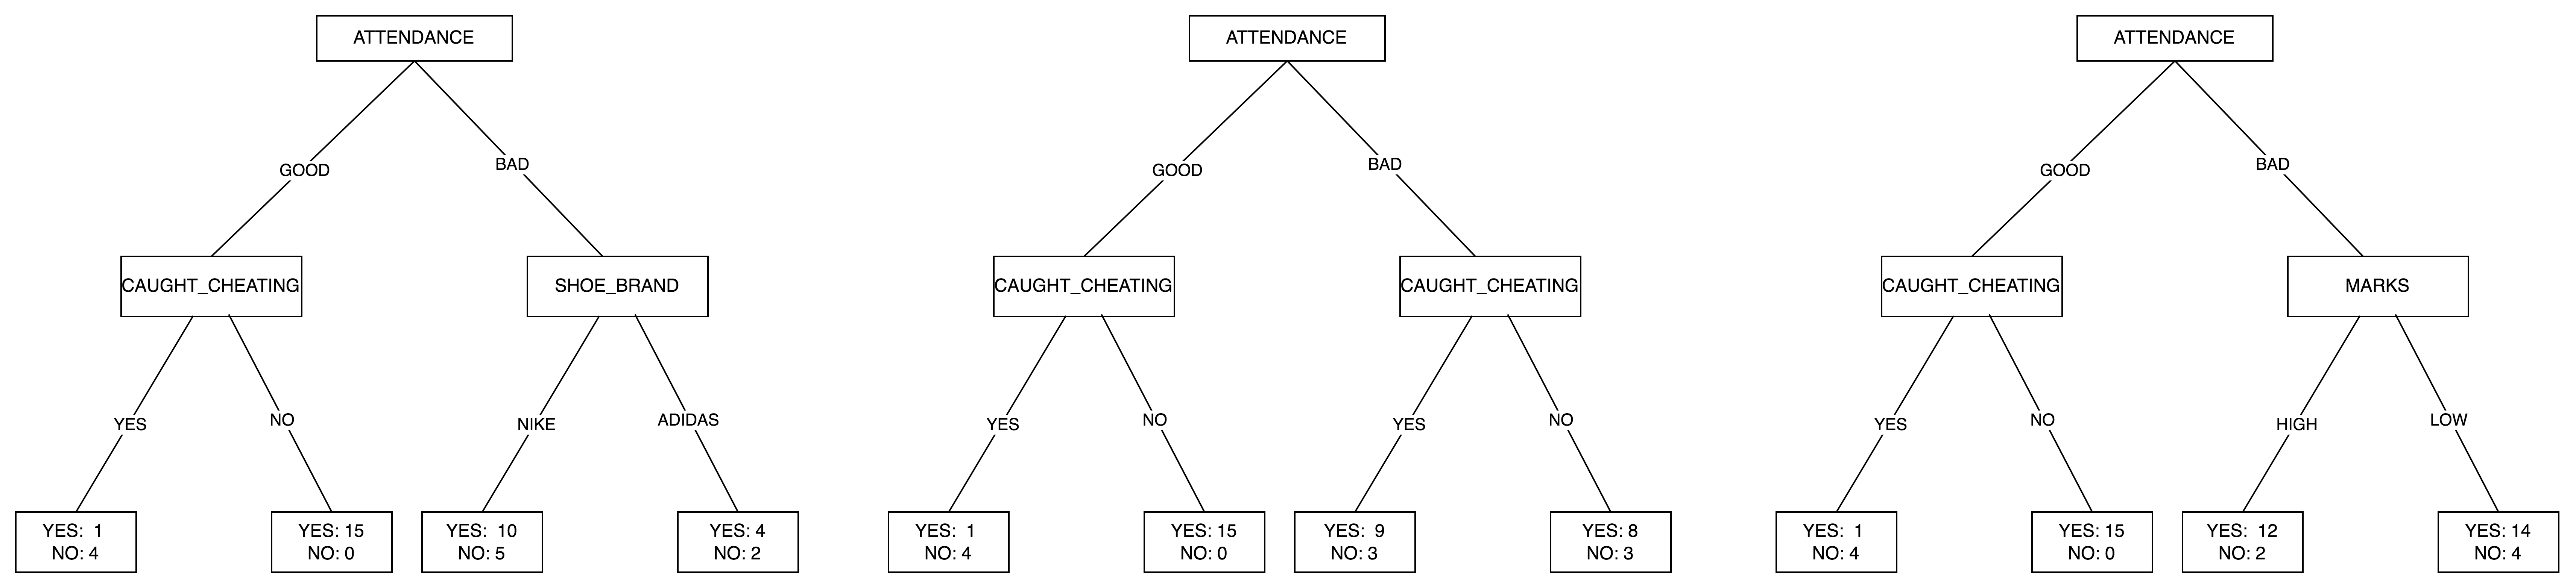

We see that the attribute "MARKS" gives us the lowest GINI score (Relative to SHOE_BRAND, and CAUGHT_CHEATING). So, do we proceed with it?
\
\
**Remember, we aim to progressively reduce the GINI impurity as we move down the Branch**. Although the Attribute "MARKS" has a LOWER GINI impurity (0.21) than the other attributes, we see that it is HIGHER than the GINI impurity for the "Attendance" (0.20) (Parent) Attribute. That is, the performance worsens when we try to further split it. We can thus say that we have arrived at our optimum solution (**Leaf node**) for the RIGHT MOST BRANCH.
\
\
Similary, we can show that the other branches have also reached their leaf nodes
\
The final Decision Tree:

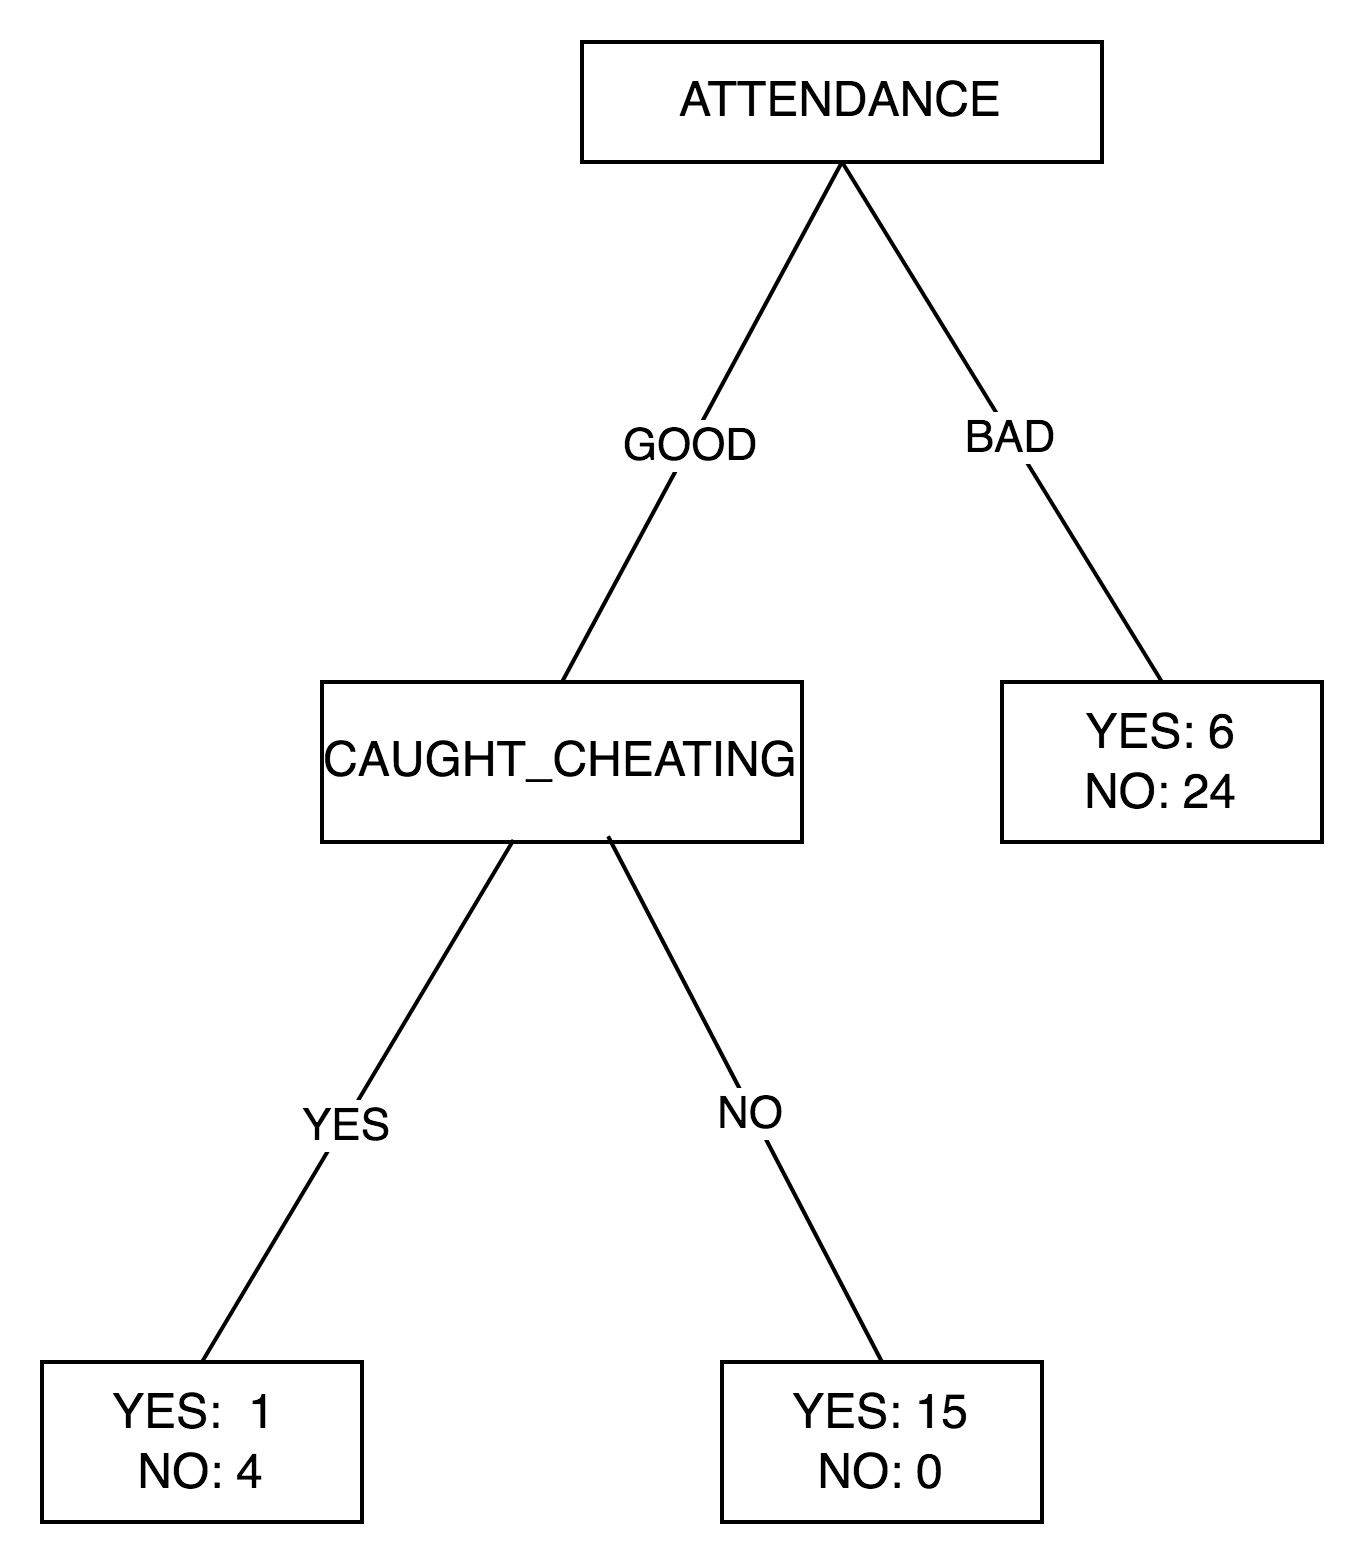

Let us summarize decision trees:
- First, we need to pick the ROOT NODE of the TREE.
- STEP 1: We calculate the GINI IMPURITY for each attribute, and then pick the attribute with the LOWEST value. This becomes our ROOT NODE.
- STEP 2: IF the resulting child nodes are PURE, then we can freeze the corresponding branch.
-STEP 3: If the resulting CHILD NODE is IMPURE, we check if it can be FURTHER DIVIDED. That is, we calculate the GINI IMPURITY of each attribute and pick the attribute with the LOWEST value. If the LOWEST GINI IMPURITY value is LOWER than the GINI IMPURITY of the Child node, then we proceed with the division, else, we can freeze that branch.
- Repeat steps 2 and 3 till NO further division is possible.


# How to handle missing data
In the above example, we discussed how "Attendance" was a good attribute to start our split.
\
What if a student had a NULL value for the attendance attribute? Do we ignore the student completely?
\
In general, for any application in Machine Learning, we want to maximize the usable data.
\
\
There are a few ways we can approach this problem.
\
\
We can find an attribute that has a HIGH correlation with the attribute with the missing value. For example, You can imagine that there might EXIST a correlation between ATTENDANCE and MARKS. A student who scores HIGH MARKS usually happens to also have a HIGH ATTENDANCE.
\
\
Therefore, for a student with a MISSING value for attendance, you can look at using the student's MARKS as an indicator of Attendance.
\
\
HIGH MARKS -> MOST LIKELY HIGH ATTENDANCE
\
LOW MARKS -> MOST LIKELY LOW ATTENDANCE
\
\
\
Alternatively, you can fit a logistic regression model to predict the unknown value.

#Random forests:
IF you go back to the ML metrics notebook, we had defined OVERFITTING as the scenario where the model overly specializes in the training data. Do you think Decision trees are prone to overfitting?
\
\
Yes. Like most Machine Learning models, Decision trees are prone to overfitting. Each data point plays a significant role in influencing the branching of the tree. How can we deal with the problem of overfitting Decision trees? On initial review, it does not seem like we can use regularization techniques on decision trees.
\
\
Imagine that we are planning for a new high-rise in the center of the city. Who would you talk to? Would you talk to just one person or a bunch? You might have to consult with:
\
The budget manager, to understand the costs
\
Residents, to consult about noise problems
\
The chief architect, to understand the footprint of the building
\
and so on...
\
\
Finally, after you have spoken to everyone relevant to the project, you might take a call to either proceed with the construction or drop it. If more than half of the people you spoke to bring up a problem that could hinder the construction, it might not seem like the project is worth the time. You might end up incurring losses trying to fix the problems (Which in this case, are in majority)
\
\
\
What we described above is the main working principle of Random forests.
\
\
Instead of relying on a SINGLE tree, we construct multiple trees and then pass the data point through each tree individually. WE then take a poll on the results. If the NOs outweigh the YESs, then we predict the result to be a NO, or vice versa.
\
\
\
How are these "multiple" trees different from each other?
\
\
Each TREE is trained based on a SUBSET of the entire dataset.

In [ ]:
import numpy as np
import random
import pandas as pd



column_names=['Shoe_brand','Caught_cheating','Attendance', 'Marks', 'Research_interest','Nobel_Prize']
expected_values=[['Nike', 'Puma'], ['Yes', 'No'], ['High', 'Low'], ['High', 'Low'], ['Yes', 'No'], ['Yes', 'No']]

def random_data_fill(column_names, expected_values, numer_of_entries):
  temp_lst =[]
  result = []
  i=0
  while(i<numer_of_entries):
    j=0
    while(j<len(column_names)):
      x=random.uniform(0,1)

      if(x<0.5):
        temp_lst.append(expected_values[j][0])
      else:
        temp_lst.append(expected_values[j][1])
      j=j+1
    result.append(temp_lst)
    temp_lst=[]
    i=i+1
  df = pd.DataFrame(result, columns = column_names)
  return df


df = random_data_fill(column_names, expected_values, 6)
df


,Shoe_brand,Caught_cheating,Attendance,Marks,Research_interest,Nobel_Prize
0,Puma,No,Low,High,Yes,No
1,Nike,No,Low,Low,Yes,Yes
2,Nike,No,Low,Low,Yes,Yes
3,Nike,No,Low,Low,No,Yes
4,Puma,Yes,High,Low,Yes,Yes
5,Puma,No,Low,Low,No,Yes


Let us consider the Nobel Prize example we used in the Decision Tree section (With an extra attribute "Research_interest"
\
\
First, we select a random subset of all the entires. In the above dataframe we have 6 entries (0 indexed). We randomly SELECT 6 entries from the dataset. Imagine rolling a dice. We roll the dice 6 times and pick the corresponding row index.
\
\
The new dataset MOST LIKELY consists of rows that repeat. Hence, the new dataset is of the same length as the old one, but, also consists of repeating data points. This is called as **BOOTSTRAPPED dataset**.
\
\
Are we done? No. We have a subset of the data, yes. But, we are interested in the attributes. The goal is that the model does not over-specialize to a "particular" attribute (Like Marks, Research_interest, etc)
\
\
How do we do that?
\
\
Just like data points, we randomly select attributes!

We follow the same steps that we followed for Decision Trees.
\
\
We calculate the root node and the subsequent branches till we reach the leaf node of that branch. (using GINI impurities).
\
\
The ONLY difference is that instead of selecting the attribute with the LOWEST GINI IMPURITY from all the available attributes, we select the attribute with the lowest GINI IMPURITY from a random subset of ATTRIBUTES
\
\
The number of randomly selected attributes can be any number (< total number of attributes).
\
For our example, let us consider it to be 2.
\
\
For the ROOT node calculation, say that we randomly pick "shoe_brand" and "Caught_cheating"

In [ ]:
df[['Shoe_brand', 'Caught_cheating']]

,Shoe_brand,Caught_cheating
0,Puma,No
1,Nike,No
2,Nike,No
3,Nike,No
4,Puma,Yes
5,Puma,No


Lets say that the GINI impurity for attribute Caught_cheating is lower than Shoe_brand.

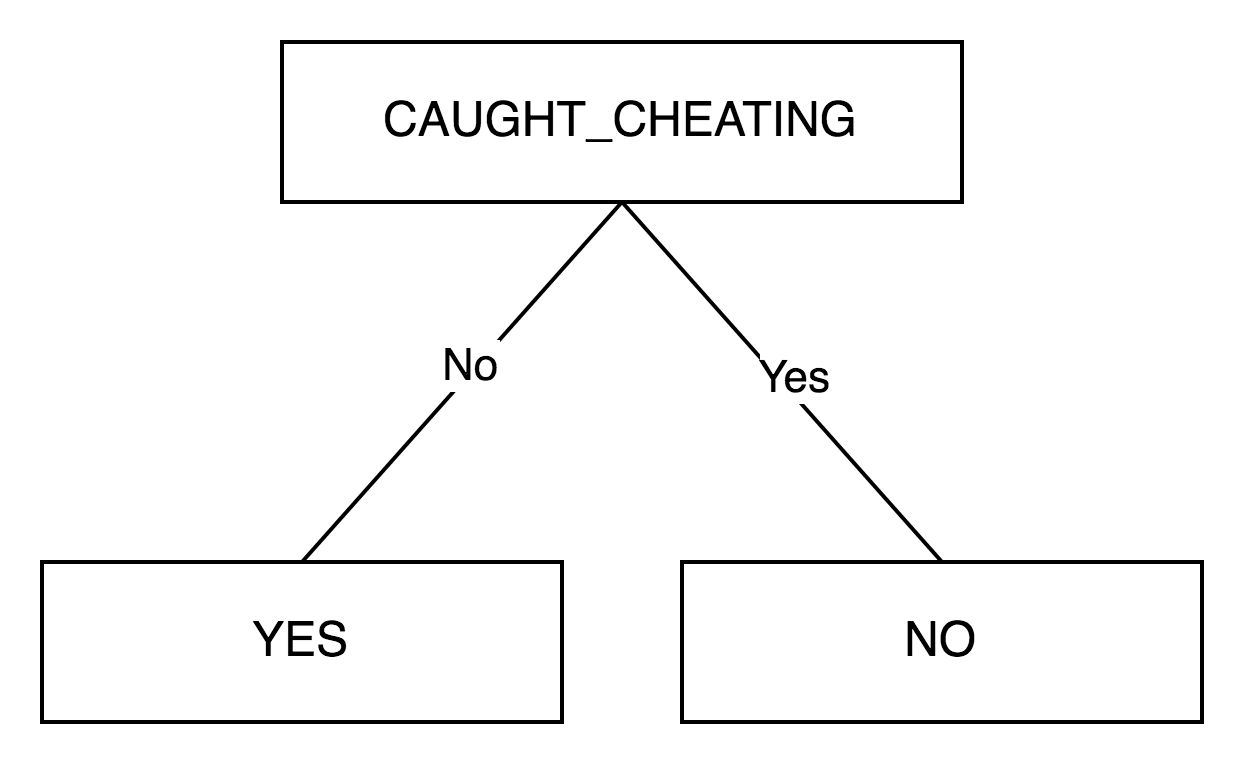

Now, we can grow the tree by selecting the attribute with the lowest GINI IMPURITY from a subset of attributes:

In [ ]:
#@title
def highlight_cols_grey(s):
    color = 'grey'
    return 'background-color: %s' % color

df.style.applymap(highlight_cols_grey, subset=pd.IndexSlice[:, ['Caught_cheating']])


,Shoe_brand,Caught_cheating,Attendance,Marks,Research_interest,Nobel_Prize
0,Puma,No,Low,High,Yes,No
1,Nike,No,Low,Low,Yes,Yes
2,Nike,No,Low,Low,Yes,Yes
3,Nike,No,Low,Low,No,Yes
4,Puma,Yes,High,Low,Yes,Yes
5,Puma,No,Low,Low,No,Yes


We gray out "Caught_cheating" as we do not want to re-select the same column twice. (Just like how for decision trees, WE DO NOT repeat an attribute for a particular branch). We then randomly select TWO attributes, calculate the GINI impurities, and select the attribute with the lowest value.
\
\
For our example, let us say that we randomly pick:

In [ ]:
#@title

df[['Shoe_brand', 'Research_interest']]

,Shoe_brand,Research_interest
0,Puma,Yes
1,Nike,Yes
2,Nike,Yes
3,Nike,No
4,Puma,Yes
5,Puma,No


Let us assume that the attribute "Research_interest" gives us a smaller GINI IMPURITY value than Shoe_brand, hence, we pick Research_interest.

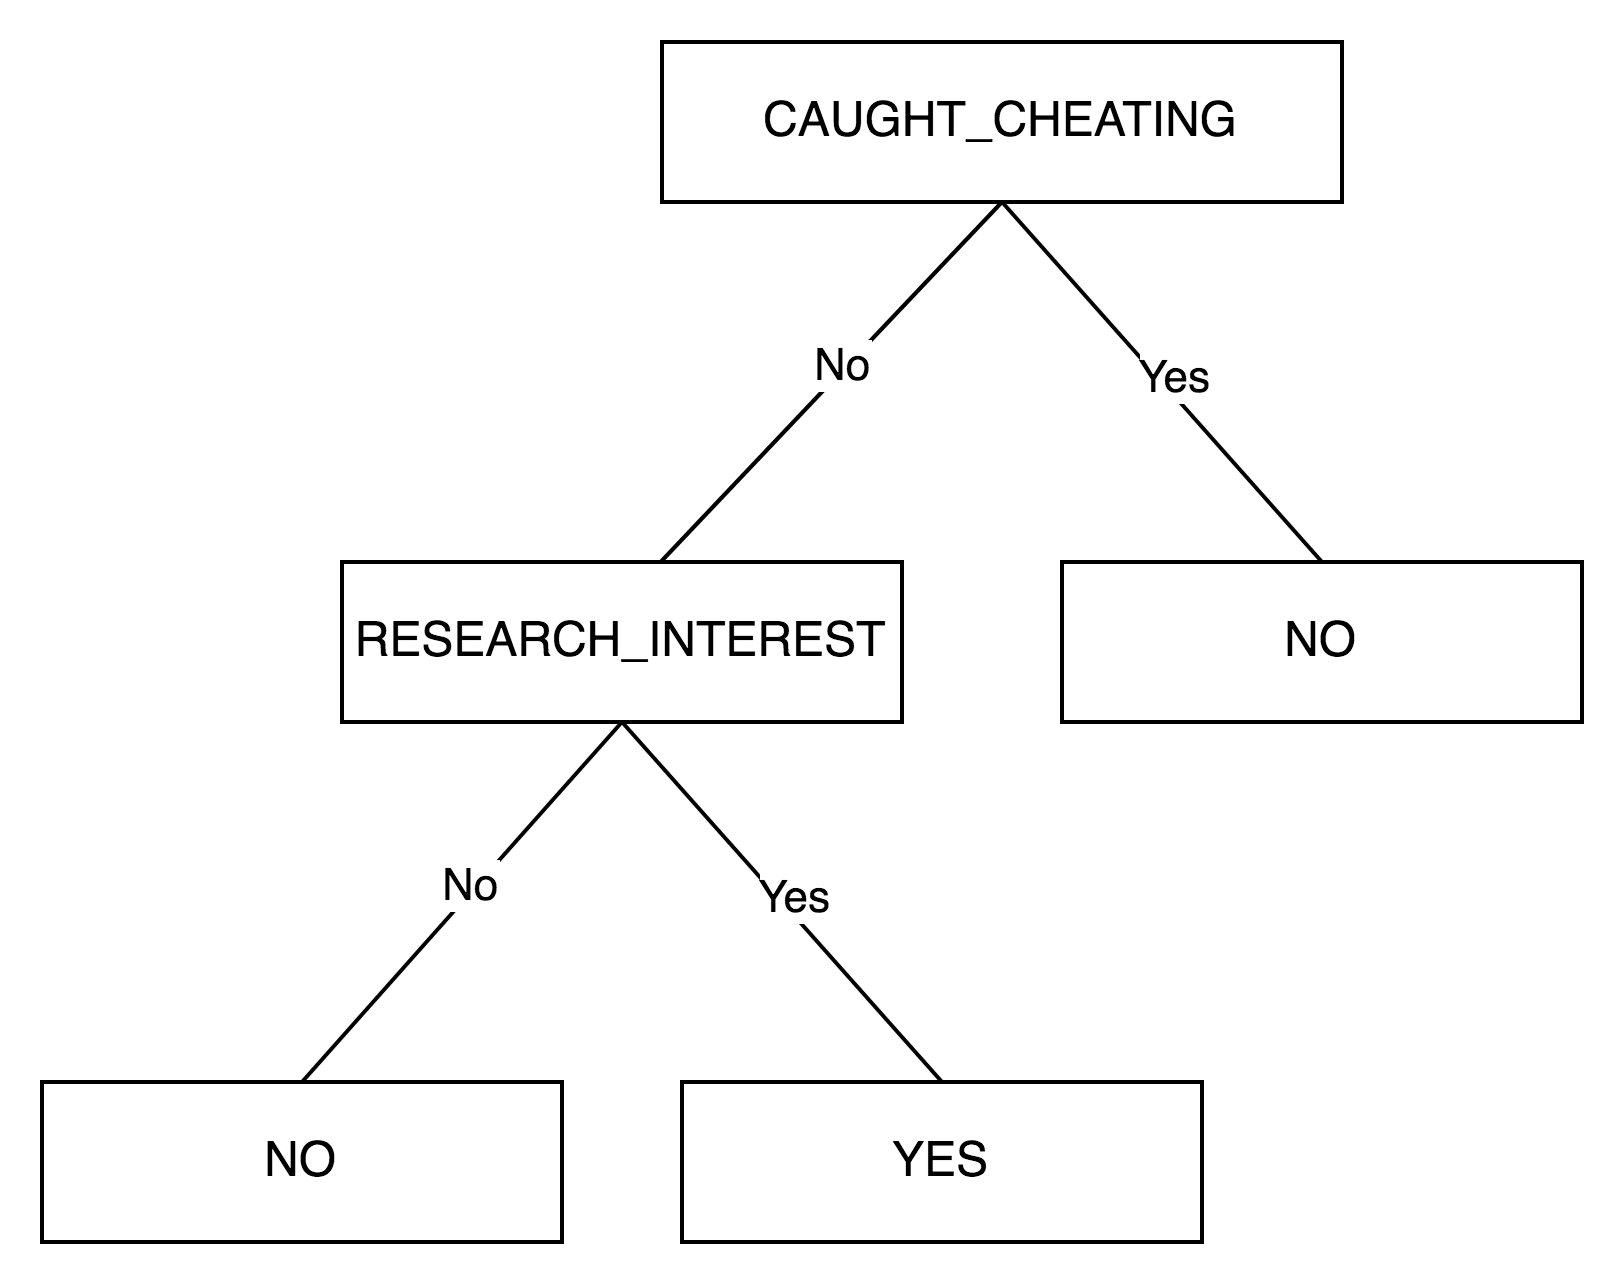

For the subsequent calculations of that particular branch, the attributes "Research_interest" and "Caught_cheating" are greyed out.

In [ ]:
#@title

df.style.applymap(highlight_cols_grey, subset=pd.IndexSlice[:, ['Research_interest','Caught_cheating']])


,Shoe_brand,Caught_cheating,Attendance,Marks,Research_interest,Nobel_Prize
0,Puma,No,Low,High,Yes,No
1,Nike,No,Low,Low,Yes,Yes
2,Nike,No,Low,Low,Yes,Yes
3,Nike,No,Low,Low,No,Yes
4,Puma,Yes,High,Low,Yes,Yes
5,Puma,No,Low,Low,No,Yes


We continue doing this TILL we either RUN out of attributes, or we accomplish a PURE node, or the resulting GINI impurities are higher than the parent node. All these cases will result in a leaf node.
\
\
Let us assume that we cannot go any futher:
\
hence, our final Decision Tree will look like:

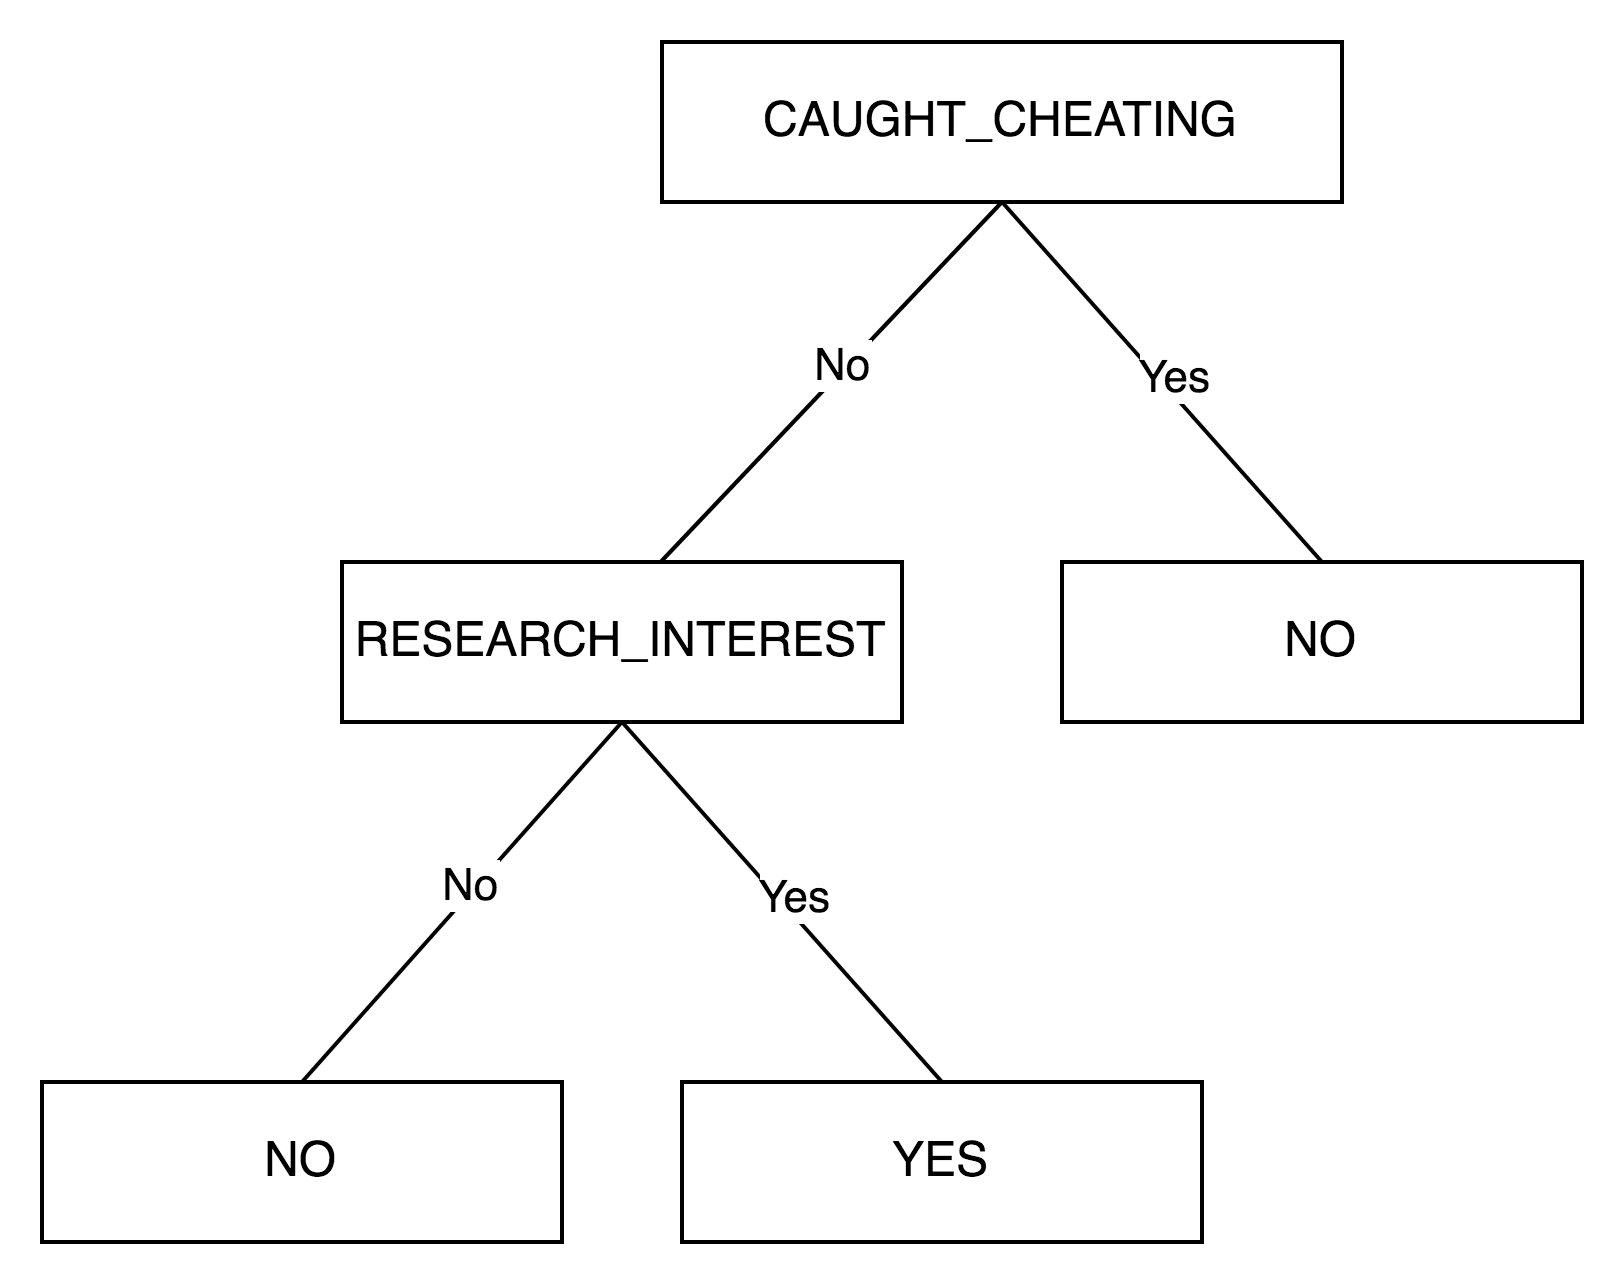

Is this it? No. How did we coin the term "random forests"?
\
\
The word random comes from how the tree is designed. That is, by selecting random sets of attributes. The word "forests" comes from the fact that this model comprises multiple TREES (Just like regular forests).
\
\
Hence, we need to calculate several such TREES based on random selections of data. Typically, we usually try to build a forest of 100s of TREES (Based on the availability of data)
\
\
We then pass each data point through ALL of the TREES (In the forest) and then take a poll on the results.

**Let us summarize Random forests**:

- STEP 1: We create a BOOTSRAPPED DATASET of the same length as the original dataset, but, containing randomly selected rows.
- STEP 2: We select some random attributes (2 in our case) from the BOOTSTRAPPED DATASET for modeling the Decision Tree. For each branch, we grey out the previously selected attributes.
- STEP 3: We repeat STEP 2 till we reach the Leaf Nodes (That is, the Decision Tree is fully built).
- STEP 4: We repeat STEP 1-3 multiple times(~100) till we have a bunch of TREES(Known as forests)

**NOTE**: Usually, the overall result is affected by the number of randomly selected attributes (two in our example). Hence, we need a method to compare the results BETWEEN TWO Random Forests. We can do this by cropping a section of the training data and labeling it as the testing set. We can create random forests where N (Number of randomly selected attributes) = 2,3,4... The resulting random forests can be compared with each other on the testing set.
\
\
**NOTE**: We call the method of creating multiple models from Bootstrapped dataset as Bagging.

How to predict results using Random Forests:
\
\
Assume that we have 110 trees in our Random Forests model:
\
We run the prediction on each tree individually. Then we count the number of YESs. If the YESs is >=55, we predict the result as YES, else a NO.




---

